In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from vpython import *

<IPython.core.display.Javascript object>

# 2. Plotting experimental data

(a) In the on-line resources you will find a file called sunspots.txt, which contains the
observed number of sunspots on the Sun for each month since January 1749. The file
contains two columns of numbers, the first being the month and the second being
the sunspot number. Write a program that reads in the data and makes a graph of
sunspots as a function of time.

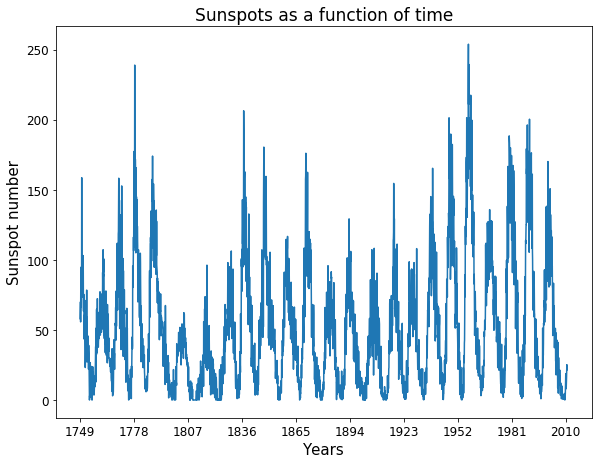

In [2]:
# Lectura de los datos
data_sunspots = np.loadtxt("sunspots.txt",float)

# Gráfica de los datos
fig_2a, ax_2a = plt.subplots(figsize=(1.5*6.4, 1.5*4.8)) 
ax_2a.plot(data_sunspots[:,0],data_sunspots[:,1]) # x: tiempo, y: número de sunspots
ax_2a.set_xlabel("Years",fontsize=15)
ax_2a.set_ylabel("Sunspot number",fontsize=15)
ax_2a.set_title("Sunspots as a function of time",fontsize=17)
# Modificar ticks
ax_2a.set_xticks(np.arange(0,3144,12*29))
ax_2a.set_yticks(np.arange(0,300,50))
ax_2a.set_xticklabels([str(i) for i in range(1749,2011,29)],fontsize=12)
ax_2a.set_yticklabels([str(i) for i in range(0,300,50)],fontsize=12)
plt.show()

(b) The file stm.txt contains a grid of values from scanning tunneling microscope measurements of the (111) surface of silicon. A scanning tunneling microscope (STM) is
a device that measures the surface of a solid at the atomic level by tracking a sharp
tip over the surface and measuring quantum tunneling current as a function of position. The end result is a grid of values that represent the height of the surface and the
file stm.txt contains just such a grid of values. Write a program that reads the data
contained in the file and makes a density plot of the values. Use the various options
and variants you have learned about to make a picture that shows the structure of
the silicon surface clearly.

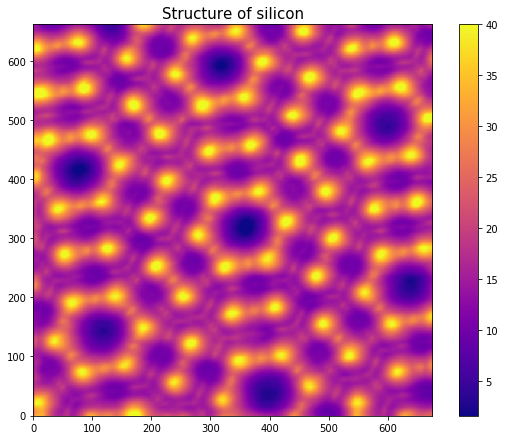

In [3]:
# Lectura de datos
data_stm = np.loadtxt("stm.txt",float)

# Density plot
fig_2b, ax_2b = plt.subplots(figsize=(1.5*6.4,1.5*4.8))
dens_plot = ax_2b.imshow(data_stm,origin="lower",cmap='plasma',vmax=40)
fig_2b.colorbar(dens_plot)
ax_2b.set_title("Structure of silicon",fontsize=15)
plt.show()
plt.savefig("name")

# 3. Visualizing lattices

Example 4.2 in the book gives a program that creates a computer
visualization of a simple cubic lattice. Using that program as a starting point, or starting
from scratch if you prefer, do the following:

(a) A sodium chloride crystal has sodium and chlorine atoms arranged on a cubic lattice but the atoms alternate between sodium and chlorine, so that each sodium is surrounded by six chlorines and each chlorine is surrounded by six sodiums. Create
a visualization of the sodium chloride lattice using two different colors to represent
the two types of atoms. (If you print out the result in black-and-white, make sure to
use colors that are clearly distinguishable.)

In [7]:
scene_3a = canvas()

RNa = 0.227  #radio de Van der Waals de Na en pm
RCl = 0.175  #radio de Van der Waals de Cl en pm
L = 2 # 2*L+1 = átomos por fila

for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            if (i%2)^((j%2)^(k%2)): # Operación lógica para ubicar los átomos de Na
                sphere(radius=RNa,pos=vector(i,j,k),color=color.red)
            else: 
                sphere(radius=RCl,pos=vector(i,j,k)) 

<IPython.core.display.Javascript object>

(b) The face-centered cubic (fcc) lattice, which is the most common lattice in naturally
occurring monatomic crystals, consists of a cubic lattice with atoms positioned not
only at the corners of each cube but also at the center of each face. Create a visualization of an fcc lattice with a single species of atom (such as occurs in metallic iron, for instance).

In [9]:
scene_3b = canvas()

RFe = 0.126 #nm: Radio atómico del Fe
L = 2

for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            if (i%2)^((j%2)^(k%2)) and L%2!=0: 
                sphere(radius=RFe,pos=vector(i,j,k),color=color.green)
            if not (i%2)^((j%2)^(k%2)) and L%2==0: 
                sphere(radius=RFe,pos=vector(i,j,k),color=color.green)

<IPython.core.display.Javascript object>

# 4. Visualization of the solar system

The innermost six planets of our solar system revolve
around the Sun in roughly circular orbits that all lie approximately in the same (ecliptic)
plane. Here are some basic parameters:

|   Object      | Radius of object (km)|  Radius of orbit (millions of km)| Period of orbit (days)|

| Mercury |       2440       |       57.9       |       88.0      |

|  Venus  |       6052       |       108.2      |      224.7      |

|  Earth  |       6371       |       149.6      |      365.3      |

|   Mars  |       3386       |       227.9      |      687.0      |

| Jupiter |       69173      |       778.5      |      4331.6     |

|  Saturn |       57316      |      1433.4      |     10759.2     |

(a) Write down equations for the coordinates x, y of a planet in the plane of the ecliptic
at time t, assuming that it lies on the x-axis at t = 0 and travels in a circular orbit
with radius R.

In [11]:
# Datos
planets = ['Mercury','Venus','Earth','Mars','Jupyter','Saturn']
radii = np.array([2.44,6.052,6.371,3.386,69.173,57.316])
orbit = np.array([57.9,108.2,149.6,227.9,778.5,1433.4])
period = np.array([88.0,224.7,365.3,687.0,4331.6,10759.2])

# Frecuencia angular del movimiento
omega = 2*np.pi/period # rad/day

# Coordenadas
xc = lambda t: orbit*np.cos(omega*t)
yc = lambda t: orbit*np.sin(omega*t)

(b) Using the facilities provided by the visual package, create an animation of the solar
system that shows the following:

i. The Sun and planets as spheres in their appropriate positions and with sizes
proportional to their actual sizes. Because the radii of the planets are tiny compared to the distances between them, it will be hard to see them clearly if you
display them with their correct proportionate sizes. Instead, therefore, represent
the planets by spheres with radii c1 times larger than the proportionate values
and choose a value for c1 that makes the planets visible. You’ll also need to find
a good radius for the Sun. Choose any value that gives a clear visualization.
(It doesn’t work to scale the radius of the Sun by the same factor you use for
the planets, because it’ll come out looking way too large. So just use whatever
works.) For added realism, you may also want to make your spheres different
colors. For instance, Earth could be blue and the Sun could be yellow.

ii. The motion of the planets as they move around the Sun (by making the spheres
of the planets move). In the interests of alleviating boredom, construct your
program so that time in the animation runs a factor of c2 faster than actual time.
Find a value of c2 that makes the motion of the orbits easily visible but not unreasonably fast. Use the rate function to make your animation run smoothly.

In [12]:
scene_4 = canvas(forward=vector(0,1,0)) #Vista desde arriba

s_planets = np.empty(len(planets),sphere)

for n in range(len(planets)):
    s_planets[n] = sphere()

for r, s in zip(radii,s_planets):
    s.radius = 2*r

sun = sphere(radius=60.0/2.44,color=color.yellow)

s_planets[0].color = vector(255/255,202/255,46/255) #Mercury
s_planets[1].color = vector(46/255,255/255,118/255) #Venus
s_planets[2].color = color.blue #Earth
s_planets[3].color = color.red #Mars
s_planets[4].color = vector(255/255,144/255,0/255) #Jupyter
s_planets[5].color = vector(178/255,139/255,79/255) #Saturn

for r in orbit:
    ring(pos=vector(0,0,0),axis=vector(0,1,0),radius=r, thickness=0.5, color=color.white)
    
for t in np.arange(0,100,0.1):
    rate(35)
    for i in range(len(planets)):
        x = orbit[i]*np.cos(5*omega[i]*t)
        y = orbit[i]*np.sin(5*omega[i]*t)
        s_planets[i].pos = vector(x,0,y)

<IPython.core.display.Javascript object>